# **Zomato Delivery Machine Learning Model**

**Treinamento do Modelo de Machine Learning:** Neste notebook são abordados todos os aspectos do treinamento do modelo, desde a preparação dos dados até a avaliação e aprimoramento do modelo. Ao final, é realizada uma avaliação final dos resultados obtidos.

# *Imports*

In [1]:
import os
import pandas as pd
import numpy as np

# --------------------------------------

from geopy.distance import geodesic

# --------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set2')

# --------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
path = os.path.join(os.getcwd(), 'data')

In [3]:
df = pd.read_csv(os.path.join(path, 'zomato_clean.csv'))
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30750,0xc9ab,KNPRES03DEL01,30.0,4.2,26.469003,80.316344,26.539003,80.386344,2022-02-14,18:10,18:25,Cloudy,Medium,1,Snack,motorcycle,2.0,Yes,Metropolitian,42
30751,0x1178,RANCHIRES16DEL01,35.0,4.2,23.371292,85.327872,23.481292,85.437872,2022-03-08,21:45,21:55,Windy,Jam,2,Drinks,motorcycle,1.0,No,Metropolitian,33
30752,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
30753,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           30755 non-null  object 
 1   Delivery_person_ID           30755 non-null  object 
 2   Delivery_person_Age          30755 non-null  float64
 3   Delivery_person_Ratings      30755 non-null  float64
 4   Restaurant_latitude          30755 non-null  float64
 5   Restaurant_longitude         30755 non-null  float64
 6   Delivery_location_latitude   30755 non-null  float64
 7   Delivery_location_longitude  30755 non-null  float64
 8   Order_Date                   30755 non-null  object 
 9   Time_Orderd                  30755 non-null  object 
 10  Time_Order_picked            30755 non-null  object 
 11  Weather_conditions           30755 non-null  object 
 12  Road_traffic_density         30755 non-null  object 
 13  Vehicle_conditio

# ***Preaparando os dados de treinamento***

## Encontrando a distancia em km

In [5]:
df['distance']=np.zeros(len(df))

restaurant_location = df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location = df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

print('Restaurant_Location:\n', restaurant_location)
print('\n')
print('Delivery_Location:\n', delivery_location)

Restaurant_Location:
 [[30.327968 78.046106]
 [10.003064 76.307589]
 [18.56245  73.916619]
 ...
 [26.902328 75.794257]
 [11.001753 76.986241]
 [23.351058 85.325731]]


Delivery_Location:
 [[30.397968 78.116106]
 [10.043064 76.347589]
 [18.65245  74.006619]
 ...
 [26.912328 75.804257]
 [11.041753 77.026241]
 [23.431058 85.405731]]


In [6]:
for i in range(len(df)):
    df['distance'].loc[i] = geodesic(restaurant_location[i], delivery_location[i])

df.head(5)

<ipython-input-6-9f0137680367>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'].loc[i] = geodesic(restaurant_location[i], delivery_location[i])


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.27146402322994 km
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376076976667 km
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764305929575334 km
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.9277947281095997 km
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.37348408863585 km


In [7]:
df['distance'] = df['distance'].astype('str').apply(lambda x: x.split(' ')[0]).astype('float64')
df['distance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30755 entries, 0 to 30754
Series name: distance
Non-Null Count  Dtype  
--------------  -----  
30755 non-null  float64
dtypes: float64(1)
memory usage: 240.4 KB


## Convertendo a coluna Festival para 0 e 1

In [8]:
df['Festival'].value_counts()

Festival
No     30133
Yes      622
Name: count, dtype: int64

In [9]:
df['Festival'] = df['Festival'].map({'No': 0, 'Yes': 1})
df['Festival'].value_counts()

Festival
0    30133
1      622
Name: count, dtype: int64

## Separando uma coluna com a hora do pedido

In [10]:
df['Hour'] = df['Time_Orderd'].apply(lambda x: x.split(':')[0]).astype('int')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Hour
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Jam,2,Snack,motorcycle,3.0,0,Metropolitian,46,10.271464,21
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,High,1,Meal,motorcycle,1.0,0,Metropolitian,23,6.229376,14
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Medium,1,Drinks,scooter,1.0,0,Metropolitian,21,13.764306,17
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Low,0,Buffet,motorcycle,0.0,0,Metropolitian,20,2.927795,9
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Jam,1,Snack,scooter,1.0,0,Metropolitian,41,19.373484,19


## Separando as colunas numéricas

In [11]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance', 'Hour'],
      dtype='object')

In [12]:
num_col = ['Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Vehicle_condition', 'multiple_deliveries', 'Festival', 'Time_taken (min)',
       'distance', 'Hour']
df_nm = df[num_col].copy()
df_nm

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),distance,Hour
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,0,46,10.271464,21
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,0,23,6.229376,14
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,0,21,13.764306,17
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,0,20,2.927795,9
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,0,41,19.373484,19
...,...,...,...,...,...,...,...,...,...,...,...,...
30750,30.0,4.2,26.469003,80.316344,26.539003,80.386344,1,2.0,1,42,10.432848,18
30751,35.0,4.2,23.371292,85.327872,23.481292,85.437872,2,1.0,0,33,16.576800,21
30752,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0.0,0,32,1.488112,11
30753,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1.0,0,26,6.219668,13


In [13]:
df_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          30755 non-null  float64
 1   Delivery_person_Ratings      30755 non-null  float64
 2   Restaurant_latitude          30755 non-null  float64
 3   Restaurant_longitude         30755 non-null  float64
 4   Delivery_location_latitude   30755 non-null  float64
 5   Delivery_location_longitude  30755 non-null  float64
 6   Vehicle_condition            30755 non-null  int64  
 7   multiple_deliveries          30755 non-null  float64
 8   Festival                     30755 non-null  int64  
 9   Time_taken (min)             30755 non-null  int64  
 10  distance                     30755 non-null  float64
 11  Hour                         30755 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 2.8 MB


## Aplicando get_dummies nas colunas categoricas

In [14]:
traffic_density = pd.get_dummies(df['Road_traffic_density'],  dtype=int)
traffic_density.head()

,High,Jam,Low,Medium
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0


In [15]:
weather_conditions = pd.get_dummies(df['Weather_conditions'],  dtype=int)
weather_conditions.head()

,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [16]:
type_vehicle = pd.get_dummies(df['Type_of_vehicle'],  dtype=int)
type_vehicle.head()

,electric_scooter,motorcycle,scooter
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [17]:
city = pd.get_dummies(df['City'],  dtype=int)
city.head()

,Metropolitian,Semi-Urban,Urban
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


## Concatenando os dados

In [43]:
df_dum = pd.concat([df_nm, traffic_density, weather_conditions, type_vehicle, city],  axis=1)
df_dum.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),...,Sandstorms,Stormy,Sunny,Windy,electric_scooter,motorcycle,scooter,Metropolitian,Semi-Urban,Urban
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,0,46,...,0,0,0,0,0,1,0,1,0,0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,0,23,...,0,1,0,0,0,1,0,1,0,0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,0,21,...,1,0,0,0,0,0,1,1,0,0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,0,20,...,1,0,0,0,0,1,0,1,0,0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,0,41,...,0,0,0,0,0,0,1,1,0,0


In [20]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          30755 non-null  float64
 1   Delivery_person_Ratings      30755 non-null  float64
 2   Restaurant_latitude          30755 non-null  float64
 3   Restaurant_longitude         30755 non-null  float64
 4   Delivery_location_latitude   30755 non-null  float64
 5   Delivery_location_longitude  30755 non-null  float64
 6   Vehicle_condition            30755 non-null  int64  
 7   multiple_deliveries          30755 non-null  float64
 8   Festival                     30755 non-null  int64  
 9   Time_taken (min)             30755 non-null  int64  
 10  distance                     30755 non-null  float64
 11  Hour                         30755 non-null  int64  
 12  High                         30755 non-null  int64  
 13  Jam             

# ***Treinando os Modelos***



### Separando os dados de treino e teste

In [21]:
X = df_dum.drop('Time_taken (min)', axis=1)
Y = df_dum['Time_taken (min)']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns=X.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=X.columns)

## **Treinando o modelo de Regressão Linear**


In [24]:
ln_reg = LinearRegression()

In [25]:
ln_reg.fit(x_train, y_train)

LinearRegression()

In [26]:
ln_pred = ln_reg.predict(x_test)

## **Modelo RandomForestRegressor**

In [27]:
rnd_for = RandomForestRegressor(criterion = 'squared_error', random_state = 42)

In [28]:
rnd_for.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
rnd_for_pred = rnd_for.predict(x_test)

## **Avaliando os modelos**

In [30]:
print('Linear_Regression:\n',
      'MSE:', mean_squared_error(y_test, ln_pred), '\n',
      'RMSE:', np.sqrt(mean_squared_error(y_test, ln_pred)), '\n',
      'MAE:', mean_absolute_error(y_test, ln_pred), '\n')

print('Random_Forest:\n',
      'MSE:', mean_squared_error(y_test, rnd_for_pred), '\n',
      'RMSE:', np.sqrt(mean_squared_error(y_test, rnd_for_pred)), '\n',
      'MAE:', mean_absolute_error(y_test, rnd_for_pred))

Linear_Regression:
 MSE: 34.45581986455345 
 RMSE: 5.869907994556086 
 MAE: 4.687853681990532 

Random_Forest:
 MSE: 15.312247892055922 
 RMSE: 3.9130867473205755 
 MAE: 3.1360344640728295




*   O modelo de RandomForest apresentou um desempenho melhor que o modelo de LinearRegression.


# ***Aprimorando o modelo RandomForestRegressor com Feature_Importance e GridSearchCV***

### Plotando o feature_importance do modelo RandomForestRegressor


In [31]:
feature_importance = rnd_for.feature_importances_
forest_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
forest_importances = forest_importances.sort_values(by='Importance', ascending=False)

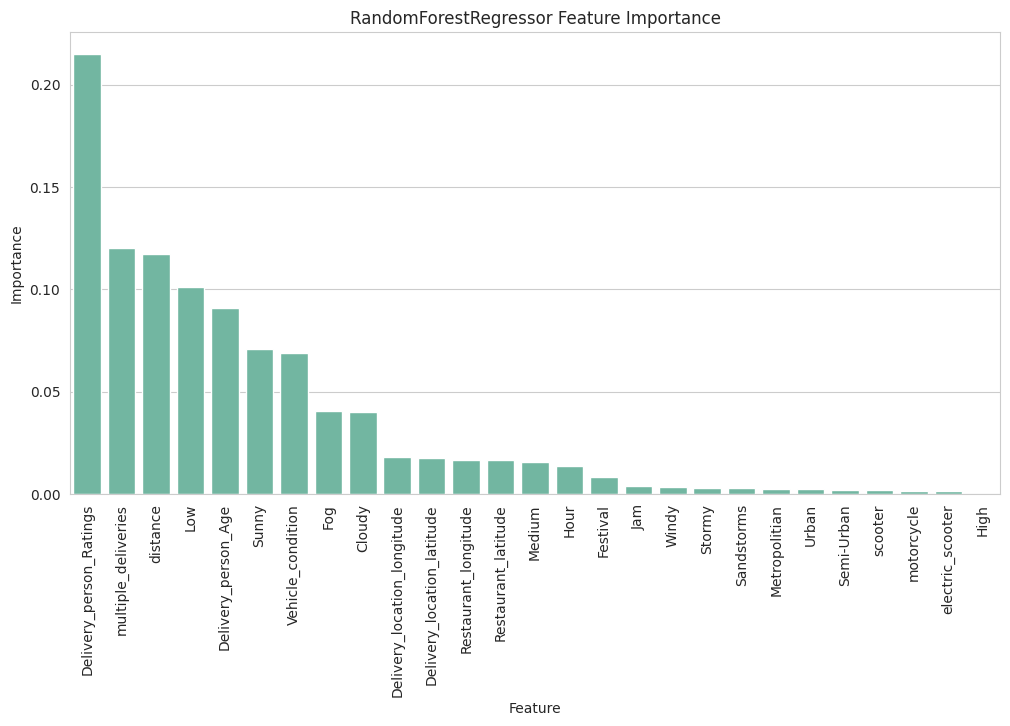

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data= forest_importances, x='Feature', y='Importance')
plt.title('RandomForestRegressor Feature Importance')
plt.xticks(rotation = 'vertical')
plt.show()

* Removendo as colunas de Latitude e Longitude



In [44]:
df_dum = df_dum.drop(columns=['Restaurant_latitude',	'Restaurant_longitude',	'Delivery_location_latitude',	'Delivery_location_longitude'])

In [45]:
X = df_dum.drop('Time_taken (min)', axis=1)
Y = df_dum['Time_taken (min)']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns=X.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=X.columns)

### Aprimorando modelo RandomForestRegressor com GridSearchCV


In [35]:
params = {'max_depth': [8, 10, 12, 14],
              'max_features': ['sqrt', 'log2', None]}

rnd_for_cv = GridSearchCV(rnd_for, param_grid=params, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

rnd_for_cv.fit(x_train, y_train)
rnd_for_cv.best_params_

{'max_depth': 12, 'max_features': None}

In [46]:
rnd_for_cv = RandomForestRegressor(max_depth = 12, max_features = None, criterion = 'squared_error')
rnd_for_cv.fit(x_train, y_train)

rnd_for_cv_pred = rnd_for_cv.predict(x_test)

# ***Avaliando os modelos***

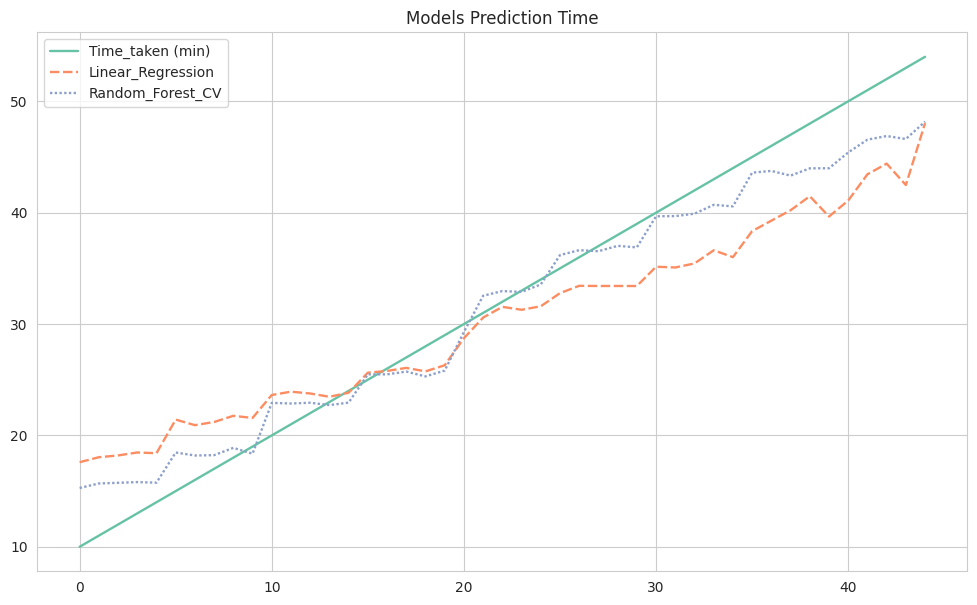

In [48]:
merged_plot = pd.DataFrame()
merged_plot['Time_taken (min)'] = y_test

merged_plot['Linear_Regression'] = ln_pred
merged_plot['Random_Forest_CV'] = rnd_for_cv_pred

# lineplot

merged_plot = merged_plot.groupby('Time_taken (min)')[['Linear_Regression', 'Random_Forest_CV']].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=merged_plot[['Time_taken (min)',
                               'Linear_Regression', 'Random_Forest_CV']],
                                linewidth = 1.7)

plt.title('Models Prediction Time')
plt.show()

In [47]:
print('Random_Forest_GridCV:\n',
      'MSE:', mean_squared_error(y_test, rnd_for_cv_pred), '\n',
      'RMSE:', np.sqrt(mean_squared_error(y_test, rnd_for_cv_pred)), '\n',
      'MAE:', mean_absolute_error(y_test, rnd_for_cv_pred))

Random_Forest_GridCV:
 MSE: 14.487286578472776 
 RMSE: 3.806216832824002 
 MAE: 3.0778570903161495


O modelo de RandomForest aprimorado apresentou os melhores resultados.

1. **Mean Squared Error (MSE):** O MSE mede a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais. Quanto menor o valor do MSE, melhor é o modelo, indicando que ele está mais próximo dos verdadeiros valores. Um MSE de 14.4 pode ser considerado bom dependendo do intervalo de valores do conjunto de dados.

2. **Root Mean Squared Error (RMSE):** O RMSE é a raiz quadrada do MSE e fornece uma interpretação mais intuitiva, pois está na mesma unidade dos dados originais. Um RMSE de 3.8 indica que, ***em média, as previsões do modelo estão a cerca de 3.8 minutos dos valores reais***.

3. **Mean Absolute Error (MAE):** O MAE é a média dos valores absolutos dos erros entre as previsões e os valores reais. Um MAE de 3.0 indica que, ***em média, o modelo erra cerca de 3 minutos em suas previsões***.

In [49]:
dif_time = pd.DataFrame()
dif_time['Time'] = y_test
dif_time['Predict'] = rnd_for_cv_pred
dif_time['Variation'] = dif_time['Time'] - dif_time['Predict']
dif_time['Variation'].describe()

count    9227.000000
mean       -0.063756
std         3.805889
min       -13.415097
25%        -2.783552
50%        -0.075250
75%         2.559476
max        13.819223
Name: Variation, dtype: float64

1. **mean (média):** O valor médio da diferença entre os tempos previstos e os tempos reais. Um valor próximo de zero indica que, em média, as previsões do modelo estão corretas. Neste caso, a média é próxima de zero (-0.063756)

2. **std (desvio padrão):** A medida de dispersão dos valores em torno da média. Um desvio padrão baixo indica que os valores estão próximos da média, enquanto um desvio padrão alto indica uma dispersão maior dos valores. Neste caso, o desvio padrão é de 3.805889, o que indica uma dispersão de aproximadamente 3.8 minutos de previsão.

3. **min (mínimo) e max (máximo):** Os valores mínimo e máximo da diferença entre os tempos previstos e os tempos reais. O valor mínimo foi de -13.4 minutos e indica a maior subestimação do modelo, enquanto o valor máximo foi de 13.8 minutos e indica a maior superestimação.

4. **25%, 50%, 75% (quartis):** Esses valores representam os quartis do conjunto de dados. O primeiro quartil (25%) indica que 25% das diferenças são menores ou iguais a -2.7 minutos, o segundo quartil (50%) indica a mediana, que é -0.07 minutos, e o terceiro quartil (75%) indica que 75% das diferenças são menores ou iguais a 2.58 minutos.

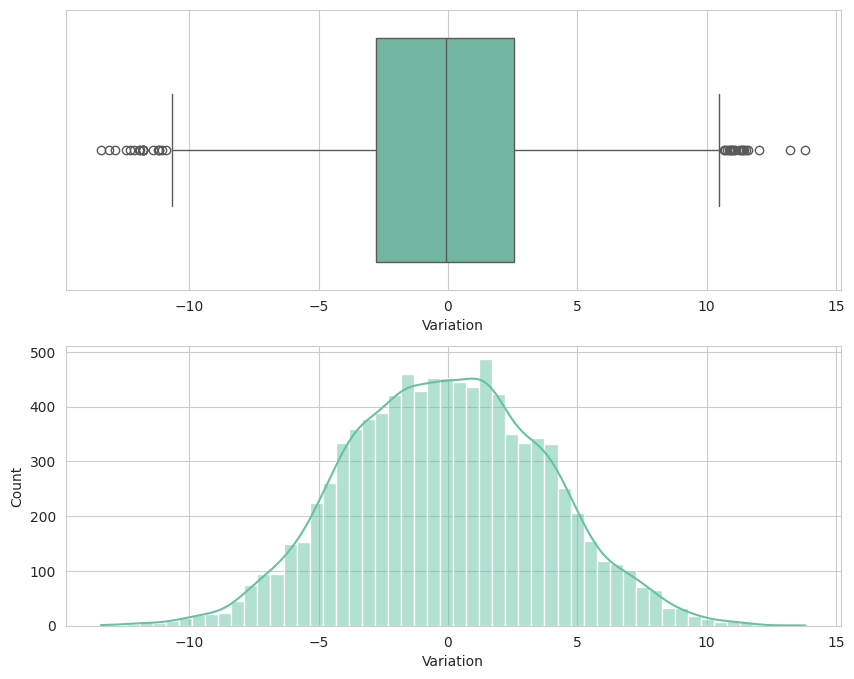

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=dif_time, x= dif_time['Variation'], ax=ax1)
sns.histplot(data=dif_time, x= dif_time['Variation'], kde=True, ax=ax2)

plt.show()